In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import collections

# Q1 -a: Erdos Renyi


In [5]:
def create_ER_random_graph(n=10,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a list of all edges:
    edges = [(u,v) for u in range(n) for v in range(n)]
    for e in edges:
        if random.random() <= p:
            G.add_edge(*e)
    return G


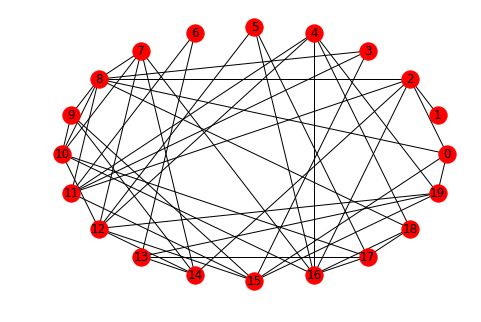

In [17]:
G1 = create_ER_random_graph(n=20,p=0.15)
nx.draw_circular(G1, with_labels=True)

# Q1 -b: Small World Model

In [7]:
def create_small_world_random_graph(n=10,k=2,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a set of all edges:
    optional_edges = {(u,v) for u in range(n) for v in range(n) if u!=v}
    chosen_edges = set()
    #Step 1
    print ("Step1 start:")
    for i in range(n):
        for j in range(k/2+1):
            for sign in [-1,1]:
                #Add the closest neighbours
                G.add_edge(i,(i+sign*j)%n)
                #Add those edges to the chosen_edges set:
                chosen_edges.add((i,(i+sign*j)%n))
                #Remove those edges from the optional_edges set:
                optional_edges.discard((i,(i+sign*j)%n))
    #nx.draw(G, with_labels=True)
    chosen_edges_list =list(chosen_edges)
    print ("Step1 is over")
    #Step 2
    for c_edge in chosen_edges:
        if random.random() <= p:
            if G.has_edge(*c_edge):
                G.remove_edge(*c_edge)
            opposite_edge = (c_edge[1],c_edge[0])
            if G.has_edge(*opposite_edge):
                G.remove_edge(*opposite_edge)
            new_edge = random.choice(filter(lambda x: x[0]==c_edge[0],optional_edges))
            G.add_edge(*new_edge)
    return G

Step1 start:
Step1 is over


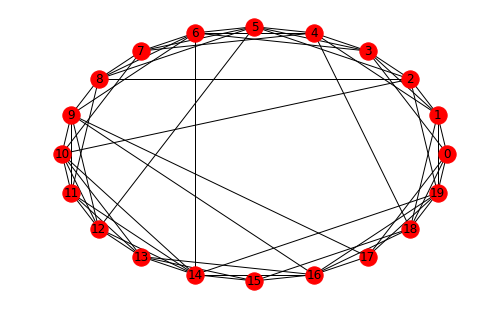

In [15]:
G2 = create_small_world_random_graph(n=20,p=0.1,k=6)
nx.draw_circular(G2, with_labels=True)

# Q1 - c: Clustering coefficient

In [11]:
def node_clustering_coeff(node,graph):
    #print "Starting: {0}".format(node)

    neighborhood = list(graph.neighbors(node))
    #print "Set: {0}".format(neighborhood)
    if node in neighborhood:
        neighborhood.remove(node)
    #print "Neighs: {0}".format(neighborhood)
    num_of_edges = 0
    for u in neighborhood:
        for v in graph.neighbors(u):
            if v in neighborhood and v != u:
                #print"({0},{1})".format(u,v)
                num_of_edges +=1
    num_of_edges = num_of_edges/2.0
    k = len(neighborhood)
    max_edges = (k*(k-1)/2.0)
    coeff = num_of_edges/max_edges
    #print "node {0}, coeff {1}, max_edges {2}, num_edges {3}".format(node, coeff, max_edges, num_of_edges)
    return coeff
        

In [12]:
def graph_clustering_coeff(graph):
    sum = 0
    amount = len(graph.nodes())
    for node in graph.nodes():
        sum += node_clustering_coeff(node,graph)
    return sum/amount
        

In [13]:
graph_clustering_coeff(G1), graph_clustering_coeff(G2)

(0.42542568542568543, 0.4492207792207793)

# Q1 - d: Running and Analysis


Step1 start:
Step1 is over
CC - ER: 0.359154953776,Small world: 0.33217952603
Diam - ER: 2,Small world: 7


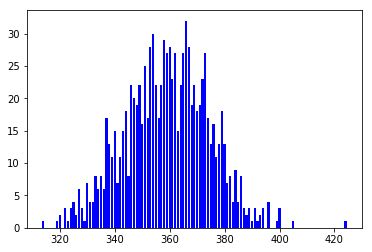

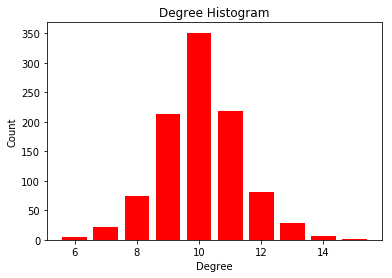

In [14]:
size = 1000
G1 = create_ER_random_graph(n=size,p=0.2)
G2 = create_small_world_random_graph(n=size,p=0.1,k=8)
print "CC - ER: {0},Small world: {1}".format(graph_clustering_coeff(G1), graph_clustering_coeff(G2))
print "Diam - ER: {0},Small world: {1}".format(nx.diameter(G1),nx.diameter(G2))

degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='r')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


plt.show()

# Q2 -a: centrality measures

In [31]:
def degree_centrality(G):
    centrality=[]
    length = len(G.nodes())
    for v in G.nodes():
        neighbors_lst = list(G.neighbors(v))
        center_val = len(neighbors_lst)/(length-1)
        centrality.append((v,center_val))
    return centrality


In [35]:
def betweenness_centrality(G):
    centrality = []
    node_lst = G.nodes()
    length = len(node_lst)
    numPaths = 0
    numPaths_node = 0
    for v in node_lst:
        res = 0
        for s in node_lst:
            for t in node_lst:
                if s<t and v!=s and v!=t:
                    for path in nx.all_shortest_paths(G, source=s, target=t):
                        numPaths += 1
                        if v in path:
                            numPaths_node += 1
                    res += (float(numPaths_node)/float(numPaths))
                    numPaths = 0
                    numPaths_node = 0
        res = res * (2.0/float((length-1)*(length-2)))
        centrality.append((v, res))
    return centrality

In [56]:
def closeness_centrality(G):
    result = []
    size = len(G.nodes())
    for v in G.nodes():
        center = 0
        distances = nx.shortest_path_length(G, source=v)
        for dis in distances.values():
            if dis != 0:
                center += dis
        center = (1.0/float(center)) * (size-1)
        result.append((v, center))
    return result

[('Medici', 0.521978021978022), ('Guadagni', 0.25457875457875456), ('Albizzi', 0.21245421245421245), ('Salviati', 0.14285714285714288), ('Ridolfi', 0.11355311355311357)]


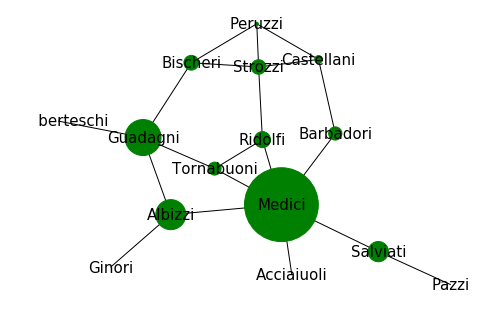

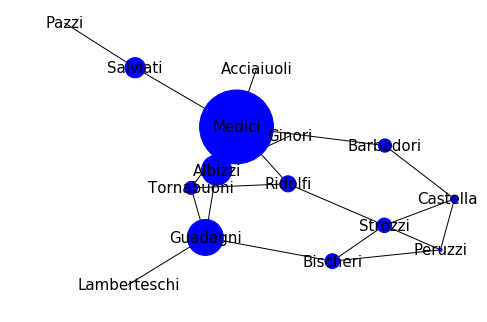